# Advanced Exploratory Data Analysis (EDA) in Python <br />  <hr style="border:4.5px solid #108999"> </hr>


# Introduction

Exploratory Data Analysis (EDA) is becoming inherently familiar with a new dataset, summarising the main characteristics of the dataset. This involves exploring dataframes and plotting various aspects of the dataset to get a visual representation of the dataset. This step is vitally important for the analysis of the dataset. It can be challenging and time consuming. However, an in-depth and broad EDA can help a lot to understand your dataset. especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

This NB will explore multiple useful EDA routines. However, to keep things short and compact it might not always dig deeper or explain all of the implications. But, spending enough time on a proper EDA to fully understand a dataset is a key part of any good data science project.

>> As a rule of thumb, you probably will spend 80% of your time in data preparation and exploration and only 20% in actual machine learning modeling.

**How to perform Exploratory Data Analysis ?**

Now this is the question everyone wnats to know the answer to. In fact, it's a bit more complicated but ultimately it is very much data driven and depends on the overall question you are trying to solve. There is no one method or common methods in order to perform EDA, whereas in this Medium article you will be able to understand some common methods and plots that would be used in the EDA process.

**What data are we exploring today ?**

While doing some research into EDA analyses I stumbled across this Kaggle dataset of cars.

</b>The data-set can be downloaded from [here](https://www.kaggle.com/CooperUnion/cardataset). To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this tutorial, we will explore the data and make it ready for modeling.

___

# Background
This exercise will use the [Palmer penguins](https://allisonhorst.github.io/palmerpenguins/articles/art.html) dataset. It contains two tables: the raw data are contained in `penguins_raw.csv` and `penguins.csv` is a curated subset of these data. You will need both for this exercise. A description of the dataset can be found [here](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/) that includes the following background information:

> The `palmerpenguins` data contains size measurements, clutch observations, and blood isotope ratios for three penguin species observed on three islands in the Palmer Archipelago, Antarctica over a study period of three years. These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The data were imported directly from the Environmental Data Initiative (EDI) Data Portal, and are available for use by CC0 license (“No Rights Reserved”) in accordance with the Palmer Station Data Policy. We gratefully acknowledge Palmer Station LTER and the US LTER Network. Special thanks to Marty Downs (Director, LTER Network Office) for help regarding the data license & use. 


<a id="t1."></a>
## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # for pretty charts
import sklearn  # modeling
import missingno as msno
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

<a id="t2."></a>
## 2. Get the Data

Using Pandas we can load the data from a .CSV file into a data frame.

If you would like to install the data  directly from Kaggle you can use: `pip install Kaggle` or `conda install Kaggle` - then use the `kaggle.api` package to install the data from Kaggle.

Otherwise download the data manually and load in the dataset using: `df = pd.read_csv("data.csv")`

### Downloading the data directly from Kaggle using the API:

Kaggle API requires an API token. Go to the Account Tab ( `https://www.kaggle.com/<username>/account`) and click ‘Create API Token’.  A file named kaggle.json will be downloaded. Move this file in to `~/.kaggle/` folder in Mac and Linux or to `C:\Users\<username>\.kaggle\`  on windows. This is required for authentication and do not skip this step.

In [2]:
# Initializing and Authenticating With API Server

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

* **In order to download the data directly from the 'Kaggle Competition' you need to go to the rules tab and accept the rules for this competition**
 > Navigate to the Kaggle competition rule tab to accept [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules)

 > Next you will be able to run the code below

In [3]:
api.dataset_download_files('parulpandey/palmer-archipelago-antarctica-penguin-data', path=None, force=False, quiet=True, unzip=True)

In [4]:
penguins_lter = pd.read_csv('penguins_lter.csv')
penguins = pd.read_csv('penguins_size.csv')

# To display the top 5 rows 
penguins.head(5)  

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
penguins_lter.head(5)  

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [14]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
new_lter = penguins_lter.copy()

In [10]:
print(new_lter['Species'].unique())

['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']


Let's chnage the Specicies name to something a bit shorter

In [17]:
new_lter['Species'] = new_lter['Species'].replace({'Adelie Penguin (Pygoscelis adeliae)':'Adelie',
                                                    'Chinstrap penguin (Pygoscelis antarctica)':'Chinstrap',
                                                    'Gentoo penguin (Pygoscelis papua)':'Gentoo'})

<a id="t3.2."></a>
### 3.2.    Structure of numerical features

Next, take a closer look at the numerical features. More precisely, investigate how many unique values each of these feature has. This process will give some insights about the number of **binary** (2 unique values), **ordinal** (3 to ~10 unique values) and **continuous** (more than 10 unique values) features in the dataset.

In [18]:
# For each numerical feature compute number of unique entries
unique_values = new_lter.select_dtypes(include='number').nunique().sort_values()

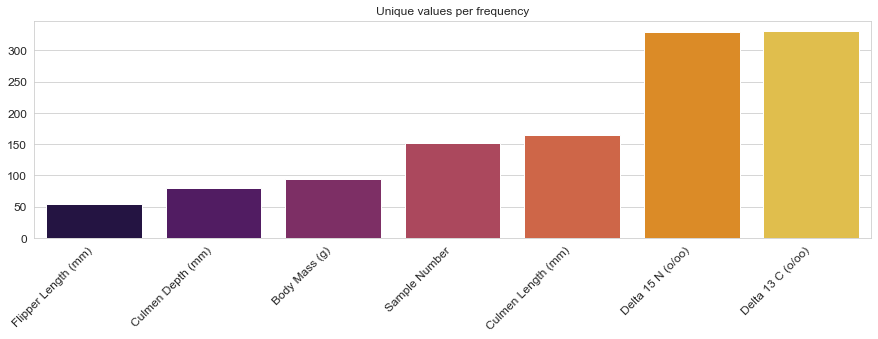

In [13]:
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

## Missing Values

Text(114.0, 0.5, 'Sample Number')

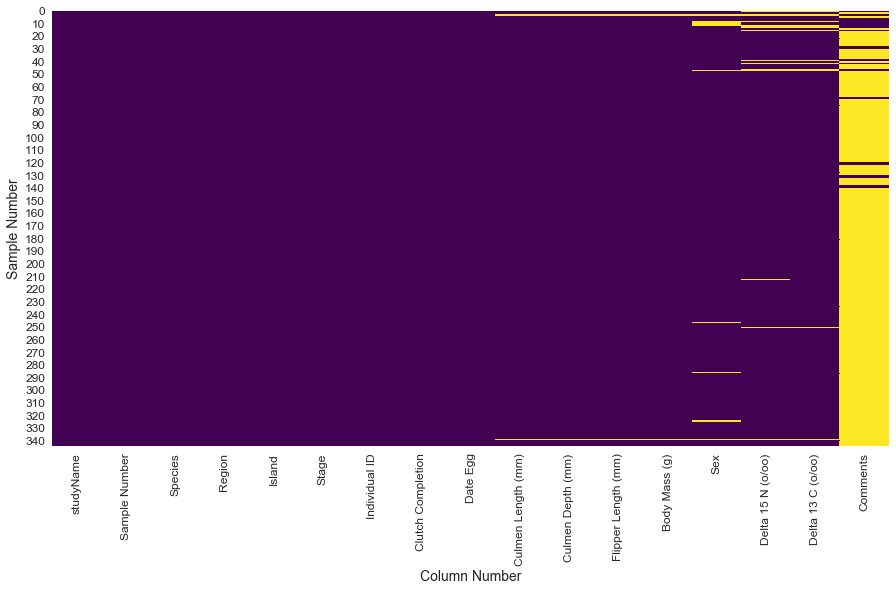

In [17]:
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(new_lter.isnull(), cbar=False, cmap='viridis')
#g = sns.heatmap(new_lter.loc[new_lter.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

The figure above shows that we have some columns with missing values. While this is already a useful plot, an even better approach is to use the [missingno](https://github.com/ResidentMario/missingno) library, to get a plot like this one:

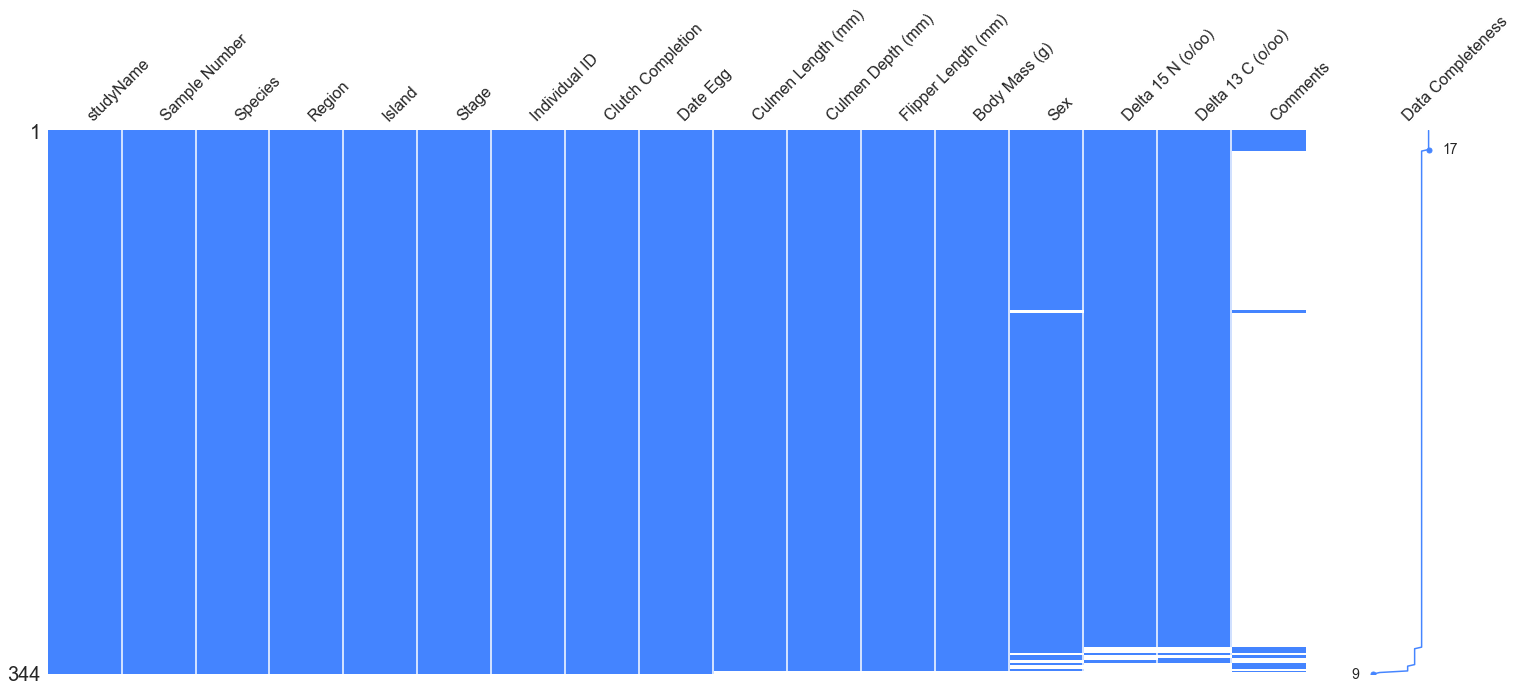

In [18]:
import missingno as msno

msno.matrix(new_lter, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

Now let's deal with the missing values

In [19]:
new_lter['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [7]:
# Start by replacing the null values with "." as part of the column contains them already
new_lter['Sex'].fillna('.', inplace=True) 

# Now let's replace UPPERCASE with lowercase
new_lter['Sex'] = new_lter['Sex'].replace({'MALE':'male','FEMALE':'female'})

# Now we fillin the "." with the mode of Sex
new_lter['Sex'] = new_lter['Sex'].replace({'.': new_lter['Sex'].mode()[0]})

Now replace the NAN in Culmen Depth (mm) with the mean length depending in the Species group it is in

In [39]:
new_lter.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [8]:
new_lter['Culmen Length (mm)'].fillna(new_lter.groupby('Species')['Culmen Length (mm)'].transform('mean'), inplace=True)

new_lter['Culmen Depth (mm)'].fillna(new_lter.groupby('Species')['Culmen Depth (mm)'].transform('mean'), inplace=True)

new_lter['Flipper Length (mm)'].fillna(new_lter.groupby('Species')['Flipper Length (mm)'].transform('mean'), inplace=True)

new_lter['Body Mass (g)'].fillna(new_lter.groupby('Species')['Body Mass (g)'].transform('mean'), inplace=True) 

new_lter['Delta 15 N (o/oo)'].fillna(new_lter.groupby('Species')['Delta 15 N (o/oo)'].transform('mean'), inplace=True) 

new_lter['Delta 13 C (o/oo)'].fillna(new_lter.groupby('Species')['Delta 13 C (o/oo)'].transform('mean'), inplace=True)

# Conversion to kilograms - this will be helpful later on
new_lter['Body Mass (kg)']=new_lter['Body Mass (g)']/1000 

Now let's drop the column that we won't be using as thse will not contribute to the model

In [9]:
new_lter=new_lter.drop(['Body Mass (g)','studyName','Sample Number','Comments','Individual ID'], axis=1) # axis = 1 for columns

Lets check to make sure all NaN is gone and visualise the data in a table

In [23]:
new_lter.info()
new_lter.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 13 columns):
Species                344 non-null object
Region                 344 non-null object
Island                 344 non-null object
Stage                  344 non-null object
Clutch Completion      344 non-null object
Date Egg               344 non-null object
Culmen Length (mm)     344 non-null float64
Culmen Depth (mm)      344 non-null float64
Flipper Length (mm)    344 non-null float64
Sex                    344 non-null object
Delta 15 N (o/oo)      344 non-null float64
Delta 13 C (o/oo)      344 non-null float64
Body Mass (kg)         344 non-null float64
dtypes: float64(6), object(7)
memory usage: 35.1+ KB


,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (kg)
0,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.100000,18.700000,181.000000,male,8.859733,-25.804194,3.750000
1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.500000,17.400000,186.000000,female,8.949560,-24.694540,3.800000
2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,40.300000,18.000000,195.000000,female,8.368210,-25.333020,3.250000
3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,38.791391,18.346358,189.953642,male,8.859733,-25.804194,3.700662
4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,36.700000,19.300000,193.000000,female,8.766510,-25.324260,3.450000


### Non-numerical features
Right now that we have dealth with the missing values, let's have a look at the remaining features to determine which will not be useful in as a feature in an ML model.

Identifying **unwanted entries** or **recording errors** on non-numerical features is a bit more tricky. Given that at this point, we only want to investigate the general quality of the dataset. So what we can do is take a general look at how many unique values each of these non-numerical features contain, and how often their most frequent category is represented.

In [62]:
new_lter.describe(exclude=['number','datetime'])

,Species,Region,Island,Stage,Clutch Completion,Date Egg,Sex
count,344,344,344,344,344,344,344
unique,3,1,3,1,2,50,2
top,Adelie,Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,11/27/07,male
freq,152,344,168,344,308,18,179


In [70]:
print('Region', new_lter['Region'].unique())
print('Island', new_lter['Island'].unique())
print('Stage', new_lter['Stage'].unique())
print('Clutch', new_lter['Clutch Completion'].unique())

Region ['Anvers']
Island ['Torgersen' 'Biscoe' 'Dream']
Stage ['Adult, 1 Egg Stage']
Clutch ['Yes' 'No']


Baed off the output above we can see that both Region and Stage only have a single entry and ultimately this won't be useful to any ML model. Therefore, we'll drop these two columns

In [10]:
new_lter=new_lter.drop(['Region', 'Stage', 'Date Egg'], axis=1)
new_lter.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (kg)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.100000,18.700000,181.000000,male,8.859733,-25.804194,3.750000
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.500000,17.400000,186.000000,female,8.949560,-24.694540,3.800000
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.300000,18.000000,195.000000,female,8.368210,-25.333020,3.250000
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.791391,18.346358,189.953642,male,8.859733,-25.804194,3.700662
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.700000,19.300000,193.000000,female,8.766510,-25.324260,3.450000


## EDA

Before building a model, it is good practice to first explore the data for to find meaningful relationships. By exploring first, we can draw conclusions for why certain features may or may not be important later. First, we will simply count the total number of species by sex.

<Figure size 288x288 with 0 Axes>

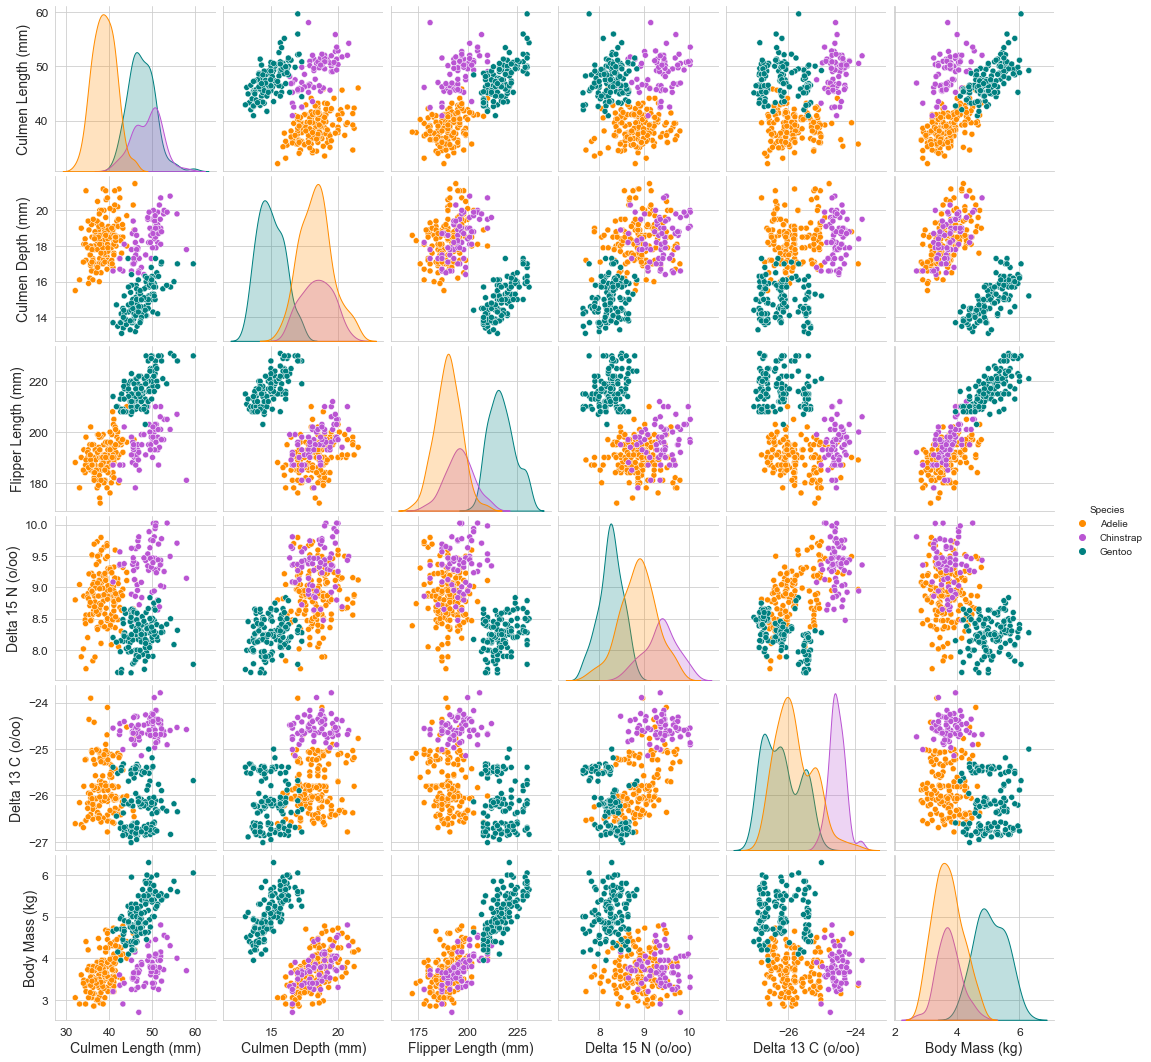

In [79]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.pairplot(data=new_lter, hue='Species', palette=('DarkOrange', 'MediumOrchid', 'Teal'))

In [109]:
new_lter.corr().style.background_gradient()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (kg)
Culmen Length (mm),1.000000,-0.237830,0.657415,-0.063791,0.187467,0.596402
Culmen Depth (mm),-0.237830,1.000000,-0.585938,0.606597,0.422703,-0.474343
Flipper Length (mm),0.657415,-0.585938,1.000000,-0.505175,-0.365075,0.871823
Delta 15 N (o/oo),-0.063791,0.606597,-0.505175,1.000000,0.572280,-0.538873
Delta 13 C (o/oo),0.187467,0.422703,-0.365075,0.572280,1.000000,-0.369294
Body Mass (kg),0.596402,-0.474343,0.871823,-0.538873,-0.369294,1.000000


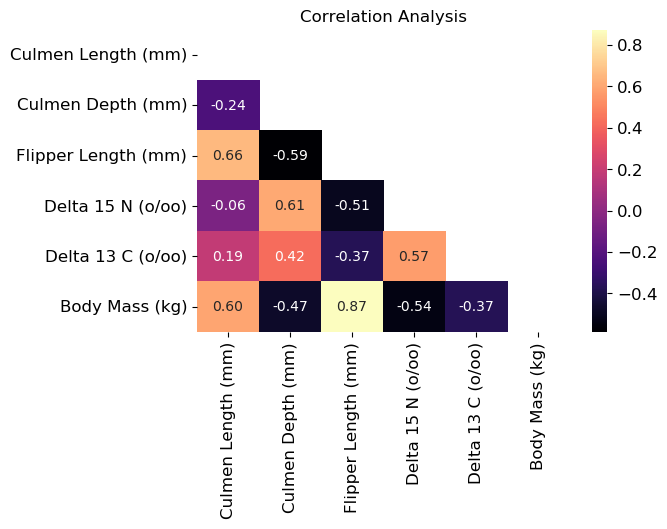

In [11]:
corr = new_lter.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=True,lw=0,linecolor='white',cmap='magma',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [25]:
def plotting_count(x,y):

    sns.catplot(data=new_lter, x=x, hue=y, kind='count', palette="Set2")

    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    #Labels
    plt.xlabel('Species', fontsize=12, fontweight='bold', color='k')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='k')  


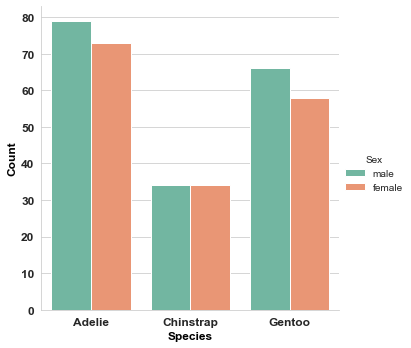

In [48]:
plotting_count('Species','Sex')

Clearly, we have a higher count of Adelie than Chinstrap which means when we move to machine learning later we may run into bias of our learning algorithm. Next, lets look at islands in which the species reside.

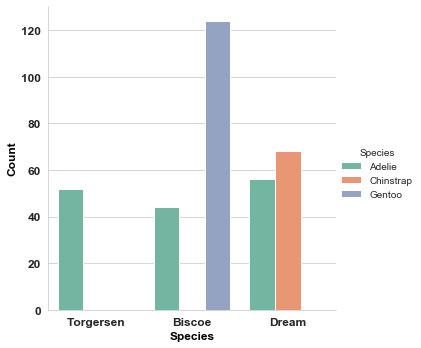

In [49]:
plotting_count('Island','Species')

Intrestingly, Adelie and Gento are each found only on a specific island. This will assist in developing a model later. Next, the categorical variables within clutch completion can be counted as well.


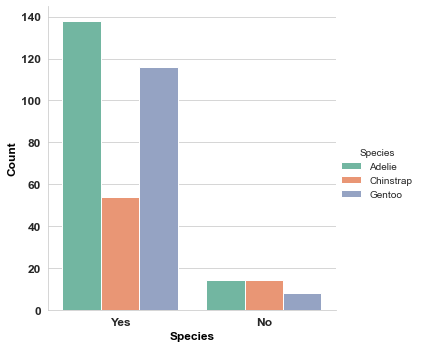

In [117]:
plotting_count('Clutch Completion','Species')

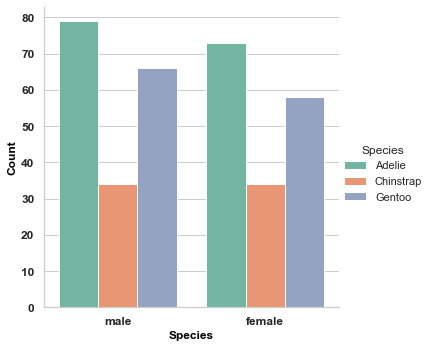

In [26]:
plotting_count('Sex','Species')

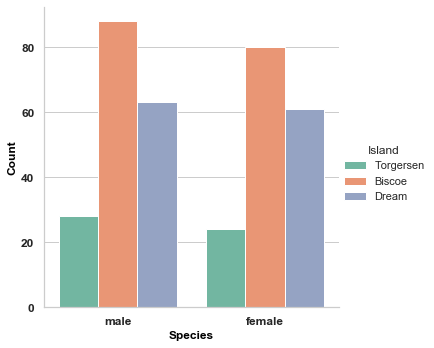

In [27]:
plotting_count('Sex','Island')

From above 3 plots we clearly see that:

- All Chinstrap penguins live in Dream Island
- All Gentoo penguins live in Biscoe Island
- Adelie Penguins are distributed everywhere in all 3 islands
- Torgersen Island contains only one type of Penguin which is Adelie
- When compared sex with species, there is no big difference in female and male
- Also, when compared sex with islands, there is no big difference in female and male
- Sex is not playing a pivotal role in distinguishing penguins, and hence we can drop sex column while building ML model.

When dealing with uneven target distributions, we may want to consider Stratified Sampling to preserve distribution among training and testing sets; more on this later.

In [134]:
new_lter.columns

Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (kg)'],
      dtype='object')

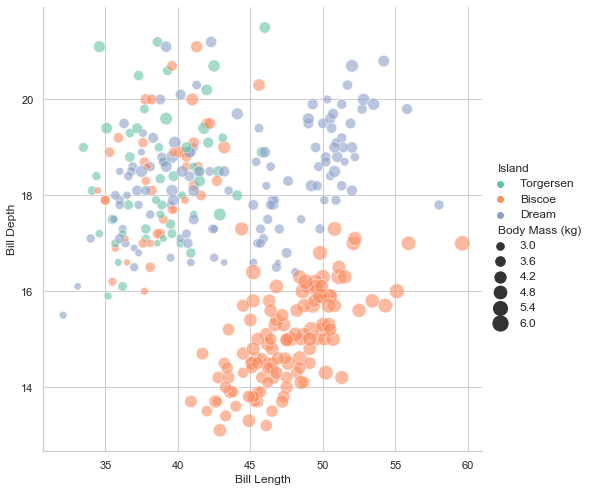

In [23]:
sns.set_theme(style="whitegrid", palette="Set2")
g = sns.relplot(data=new_lter, alpha = 0.6,
                x='Culmen Length (mm)', y='Culmen Depth (mm)',
                hue='Island', size='Body Mass (kg)',
                palette='Set2', sizes=(40, 250),height = 7)

# g.despine(left=True, bottom=True) # removes axis spines
g.set_axis_labels("Bill Length", "Bill Depth")

In [12]:
def multi_corr(data, x_col, y_col, hue_col, size_col):
    sns.set_theme(style="whitegrid", palette="Set2")
    sns.set_style("whitegrid", {'axes.grid' : False})

    g = sns.jointplot(x=x_col, y=y_col, data=data,                 
                height = 7, hue = hue_col, alpha=0.01, legend = False)

    gg = sns.scatterplot(x=x_col, y=y_col, data=data,
                hue=hue_col, size=size_col,
                sizes=(20, 200), alpha = 0.6,
                ax=g.ax_joint)

    for _,gr in new_lter.groupby(hue_col):
        sns.regplot(x=x_col, y=y_col, data=gr,
        scatter=False, ax=g.ax_joint, truncate=False)

    # Put the legend out of the figure
    plt.subplots_adjust(right=0.75)
    g.ax_joint.legend(bbox_to_anchor=(1.25,1), loc='upper left', borderaxespad=0)

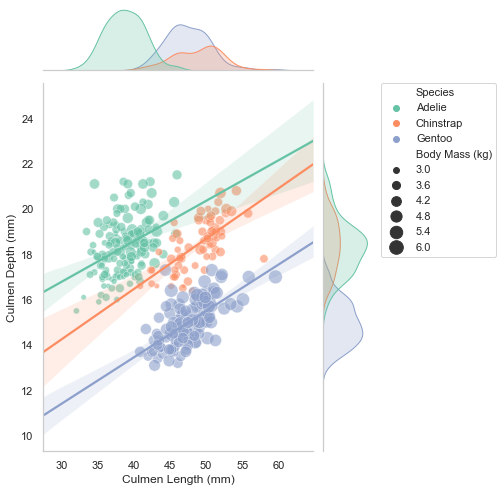

In [19]:
x_col = 'Culmen Length (mm)'
y_col = 'Culmen Depth (mm)'
hue_col = 'Species'
size_col = 'Body Mass (kg)'

multi_corr(new_lter, x_col, y_col, hue_col, size_col)

It seems Biscoe Island may have larger birds

We can create the same plot but replace hue with species to look into this more:

It seems like species Gentoo may be primarily located on Biscoe island and it seems them may also be natually larger birds.
We can also group data by island, and species count the records on each:

In [20]:
def kde_plot(df,x,z):    
    sns.kdeplot(
    data=df, x=x, hue=z,
    common_norm=False, palette='inferno',
    shade=True,
    )

def hist_plot(df,x,z):
    sns.histplot(
    data=df, x=x, hue=z,
    palette='inferno',
    )


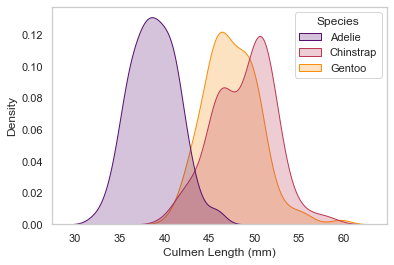

In [21]:
kde_plot(new_lter, 'Culmen Length (mm)', 'Species')

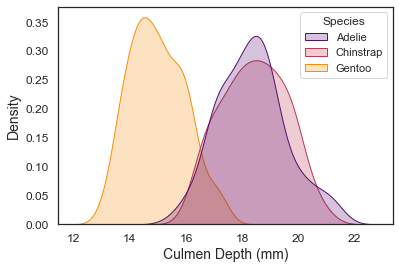

In [203]:
kde_plot(new_lter, 'Culmen Depth (mm)', 'Species')

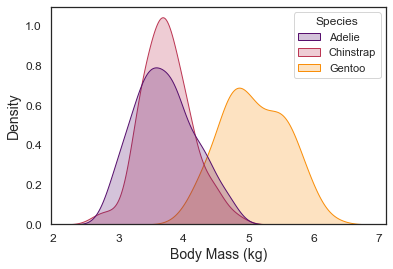

In [204]:
kde_plot(new_lter, 'Body Mass (kg)', 'Species')

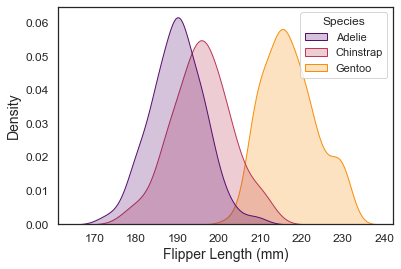

In [205]:
kde_plot(new_lter, 'Flipper Length (mm)', 'Species')

In [159]:
new_lter.columns

Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (kg)'],
      dtype='object')

Flipper Length (mm) vs Body Mass (kg)

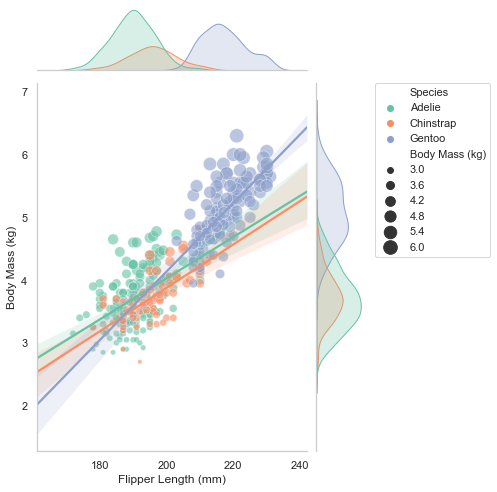

In [22]:
x_col = 'Flipper Length (mm)'
y_col = 'Body Mass (kg)'
hue_col = 'Species'
size_col = 'Body Mass (kg)'

multi_corr(new_lter, x_col, y_col, hue_col, size_col)